# CASA 0009 group work compiled python file

## 1 further data cleaning based on the first round cleaning file

In [1]:
# we will import all the necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import json
import re
from shapely.geometry import Point, LineString #this library is for manipulating geometric objects, and it is what geopandas uses to store geometries
from scipy.spatial import distance

import seaborn as sns
import matplotlib.cm as cm
import matplotlib as mpl
import os

from matplotlib.colors import ListedColormap

import sklearn
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
#from esda.adbscan import ADBSCAN

#import contextily as cx
# Make numeric display a bit neater
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

In [3]:
child=pd.read_csv('final.csv')
child.head()

,寻亲编号,性别,出生日期,出生年,出生月,出生日,失踪时身高,失踪日期,失踪年,失踪月,失踪日,失踪人所在省,失踪人所在市,失踪人所在地详情,失踪省,失踪市,失踪地点详情,寻亲者特征描述,其它资料,里面可能含失踪信息
0,340386,女,1984/3/4,"1,984.00",3.00,4.00,50.00,1984/3/8,"1,984.00",3.00,8.00,浙江省,丽水市,NaN,安徽省,亳州市,江西省鹰潭市贵溪市,身上有红色字条应该是出生日,被遗弃,鹰潭市贵溪市
1,340304,男,1985/2/12,"1,985.00",2.00,12.00,40.00,1985/2/23,"1,985.00",2.00,23.00,山东省,临沂市,罗庄区傅庄镇,贵州省,贵阳市,安徽省亳州市吕望乡某医院,无,家中有两个哥哥，我是第三子,亳州市吕望乡某医院
2,340275,女,1998/1/1,"1,998.00",1.00,1.00,NaN,1998/1/1,"1,998.00",1.00,1.00,贵州省,毕节市,NaN,江西省,鹰潭市,贵州省贵阳市不知,不知,大概出生在97、98年，从小在贵州长大，脸上有疤痕，不知道什么时候留下的,贵阳市不知
3,340368,女,1993/10/24,"1,993.00",10.00,24.00,110.00,1990/12/26,"1,990.00",12.00,26.00,湖北省,NaN,NaN,湖北省,NaN,湖北省,被送走的时候应该是3岁，具体的不知道，现在的爸妈也不告诉我,我90年的几月的没人知道，今年28岁，生身父母是湖北，姓王，也给我起过名字，王兰兰,NaN
4,340259,女,1979/4/17,"1,979.00",4.00,17.00,75.00,1982/4/17,"1,982.00",4.00,17.00,湖南省,邵阳市,NaN,湖南省,邵阳市,湖南省邵阳市胜利大饭堂,父，王冬生，母，刘秀英，隆回，周旺铺，父在煤矿上班，好像出事了,当时的口音是隆回口音,邵阳市胜利大饭堂


In [4]:
child.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35434 entries, 0 to 35433
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   寻亲编号       35434 non-null  int64  
 1   性别         35434 non-null  object 
 2   出生日期       35382 non-null  object 
 3   出生年        35382 non-null  float64
 4   出生月        35382 non-null  float64
 5   出生日        35382 non-null  float64
 6   失踪时身高      12874 non-null  float64
 7   失踪日期       35426 non-null  object 
 8   失踪年        35426 non-null  float64
 9   失踪月        35426 non-null  float64
 10  失踪日        35426 non-null  float64
 11  失踪人所在省     32386 non-null  object 
 12  失踪人所在市     31782 non-null  object 
 13  失踪人所在地详情   370 non-null    object 
 14  失踪省        29284 non-null  object 
 15  失踪市        27576 non-null  object 
 16  失踪地点详情     30821 non-null  object 
 17  寻亲者特征描述    34806 non-null  object 
 18  其它资料       29559 non-null  object 
 19  里面可能含失踪信息  29164 non-null  object 
dtypes: flo

### 1.1 delete NaNs province

In [5]:
child.drop(child[child.失踪省.isna()].index.values, axis=0, inplace=True)

In [6]:
child.drop(child[child.失踪人所在省.isna()].index.values, axis=0, inplace=True)

In [7]:
child.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26914 entries, 0 to 35432
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   寻亲编号       26914 non-null  int64  
 1   性别         26914 non-null  object 
 2   出生日期       26912 non-null  object 
 3   出生年        26912 non-null  float64
 4   出生月        26912 non-null  float64
 5   出生日        26912 non-null  float64
 6   失踪时身高      10476 non-null  float64
 7   失踪日期       26914 non-null  object 
 8   失踪年        26914 non-null  float64
 9   失踪月        26914 non-null  float64
 10  失踪日        26914 non-null  float64
 11  失踪人所在省     26914 non-null  object 
 12  失踪人所在市     26371 non-null  object 
 13  失踪人所在地详情   311 non-null    object 
 14  失踪省        26914 non-null  object 
 15  失踪市        25489 non-null  object 
 16  失踪地点详情     26908 non-null  object 
 17  寻亲者特征描述    26745 non-null  object 
 18  其它资料       22035 non-null  object 
 19  里面可能含失踪信息  26741 non-null  object 
dtypes: flo

### 1.2 calculate age of trafficked children & filter age 0-17

In [8]:
child['age']=child['失踪年']-child['出生年']

In [9]:
child.describe()

,寻亲编号,出生年,出生月,出生日,失踪时身高,失踪年,失踪月,失踪日,age
count,"26,914.00","26,912.00","26,912.00","26,912.00","10,476.00","26,914.00","26,914.00","26,914.00","26,912.00"
mean,"190,936.49","1,981.85",6.18,14.09,67.78,"1,983.00",6.31,13.80,1.16
std,"86,158.56",13.46,3.52,8.93,48.46,13.29,3.55,9.43,3.47
min,"4,534.00","1,909.00",1.00,1.00,1.00,"1,924.00",1.00,1.00,-60.00
25%,"115,889.50","1,975.00",3.00,6.00,50.00,"1,976.00",3.00,5.00,0.00
50%,"185,240.50","1,986.00",6.00,14.00,53.00,"1,987.00",6.00,14.00,0.00
75%,"267,217.50","1,991.00",9.00,22.00,80.00,"1,991.00",9.00,22.00,1.00
max,"340,399.00","2,018.00",12.00,31.00,900.00,"2,018.00",12.00,31.00,86.00


In [10]:
child=child[(child.age>=0) & (child.age<=17)]

In [11]:
child.describe()

,寻亲编号,出生年,出生月,出生日,失踪时身高,失踪年,失踪月,失踪日,age
count,"26,770.00","26,770.00","26,770.00","26,770.00","10,426.00","26,770.00","26,770.00","26,770.00","26,770.00"
mean,"190,831.32","1,981.87",6.18,14.08,67.65,"1,982.88",6.32,13.79,1.00
std,"86,181.12",13.44,3.52,8.93,48.41,13.15,3.55,9.43,2.32
min,"4,534.00","1,909.00",1.00,1.00,1.00,"1,924.00",1.00,1.00,0.00
25%,"115,748.25","1,976.00",3.00,6.00,50.00,"1,976.00",3.00,5.00,0.00
50%,"184,917.00","1,986.00",6.00,14.00,53.00,"1,987.00",6.00,14.00,0.00
75%,"267,176.50","1,991.00",9.00,22.00,80.00,"1,991.00",9.00,22.00,1.00
max,"340,399.00","2,018.00",12.00,31.00,900.00,"2,018.00",12.00,31.00,17.00


In [12]:
child.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26770 entries, 0 to 35432
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   寻亲编号       26770 non-null  int64  
 1   性别         26770 non-null  object 
 2   出生日期       26770 non-null  object 
 3   出生年        26770 non-null  float64
 4   出生月        26770 non-null  float64
 5   出生日        26770 non-null  float64
 6   失踪时身高      10426 non-null  float64
 7   失踪日期       26770 non-null  object 
 8   失踪年        26770 non-null  float64
 9   失踪月        26770 non-null  float64
 10  失踪日        26770 non-null  float64
 11  失踪人所在省     26770 non-null  object 
 12  失踪人所在市     26232 non-null  object 
 13  失踪人所在地详情   308 non-null    object 
 14  失踪省        26770 non-null  object 
 15  失踪市        25350 non-null  object 
 16  失踪地点详情     26765 non-null  object 
 17  寻亲者特征描述    26601 non-null  object 
 18  其它资料       21919 non-null  object 
 19  里面可能含失踪信息  26599 non-null  object 
 20  age   

In [13]:
#child.to_csv('child.csv')

## 2 WHO: gender-age characteristic analysis

In [14]:
child_girl=child[child.性别=='女']
child_girl.head()

,寻亲编号,性别,出生日期,出生年,出生月,出生日,失踪时身高,失踪日期,失踪年,失踪月,...,失踪人所在省,失踪人所在市,失踪人所在地详情,失踪省,失踪市,失踪地点详情,寻亲者特征描述,其它资料,里面可能含失踪信息,age
0,340386,女,1984/3/4,"1,984.00",3.00,4.00,50.00,1984/3/8,"1,984.00",3.00,...,浙江省,丽水市,NaN,安徽省,亳州市,江西省鹰潭市贵溪市,身上有红色字条应该是出生日,被遗弃,鹰潭市贵溪市,0.00
2,340275,女,1998/1/1,"1,998.00",1.00,1.00,NaN,1998/1/1,"1,998.00",1.00,...,贵州省,毕节市,NaN,江西省,鹰潭市,贵州省贵阳市不知,不知,大概出生在97、98年，从小在贵州长大，脸上有疤痕，不知道什么时候留下的,贵阳市不知,0.00
4,340259,女,1979/4/17,"1,979.00",4.00,17.00,75.00,1982/4/17,"1,982.00",4.00,...,湖南省,邵阳市,NaN,湖南省,邵阳市,湖南省邵阳市胜利大饭堂,父，王冬生，母，刘秀英，隆回，周旺铺，父在煤矿上班，好像出事了,当时的口音是隆回口音,邵阳市胜利大饭堂,3.00
8,340238,女,1995/8/1,"1,995.00",8.00,1.00,NaN,1995/12/31,"1,995.00",12.00,...,四川省,内江市,NaN,四川省,内江市,四川省内江市资中县,身高150cm，左手手臂有月牙疤痕,没有,内江市资中县,0.00
9,340246,女,1998/9/13,"1,998.00",9.00,13.00,50.00,1998/10/13,"1,998.00",10.00,...,贵州省,遵义市,NaN,重庆市,重庆市,重庆市市辖区大渡口九龙坡沙坪坝区,贵州遵义口音来，重庆菜市场做生意。,送给一个黄姓一家，后来转送给现在养父母，母亲是哑巴，父亲姓岑邱泽，黄姓和养父都是搬运工。黄姓...,市辖区大渡口九龙坡沙坪坝区,0.00


In [15]:
child_girl_age=child_girl['age'].groupby(child_girl['age']).agg(Count='count').reset_index()
child_girl_age.head()

,age,Count
0,0.00,13752
1,1.00,1557
2,2.00,477
3,3.00,449
4,4.00,322


In [16]:
child_boy=child[child.性别=='男']
child_boy.head()

,寻亲编号,性别,出生日期,出生年,出生月,出生日,失踪时身高,失踪日期,失踪年,失踪月,...,失踪人所在省,失踪人所在市,失踪人所在地详情,失踪省,失踪市,失踪地点详情,寻亲者特征描述,其它资料,里面可能含失踪信息,age
1,340304,男,1985/2/12,"1,985.00",2.00,12.00,40.00,1985/2/23,"1,985.00",2.00,...,山东省,临沂市,罗庄区傅庄镇,贵州省,贵阳市,安徽省亳州市吕望乡某医院,无,家中有两个哥哥，我是第三子,亳州市吕望乡某医院,0.00
5,340261,男,1989/8/5,"1,989.00",8.00,5.00,NaN,1989/10/1,"1,989.00",10.00,...,河南省,安阳市,NaN,山西省,阳泉市,山西省阳泉市具体地方不知道,长大以后听别人说我是抱养的，不是这边亲生的，对小时候没有任何记忆。,NaN,阳泉市具体地方不知道,0.00
6,340313,男,1993/11/7,"1,993.00",11.00,7.00,60.00,1994/1/1,"1,994.00",1.00,...,福建省,泉州市,NaN,福建省,泉州市,福建省泉州市晋江市英林镇,脑袋小，耳朵大，左耳边有小肉瘤,家里人说是10个月的时候抱来的，当时生父母有给过家里的地址，不过被现在家人毁了,泉州市晋江市英林镇,1.00
7,340211,男,1993/11/25,"1,993.00",11.00,25.00,NaN,1993/12/31,"1,993.00",12.00,...,山东省,淄博市,NaN,黑龙江省,哈尔滨市,黑龙江省哈尔滨市未知,可能是从医院被抱走的具体不明被抱走时可能就一二个月左右,不明,省哈尔滨市未知,0.00
14,340197,男,1977/1/1,"1,977.00",1.00,1.00,NaN,1982/1/1,"1,982.00",1.00,...,河南省,驻马店市,NaN,河南省,漯河市,河南省漯河市由于当时年龄太小，出生日期和丢失日期只有大概。,双耳上方有很多白发，毛寸发型。,NaN,漯河市由于当时年龄太小，出生日期和丢失日期只有大概。,5.00


In [17]:
child_boy_age=child_boy['age'].groupby(child_boy['age']).agg(Count2='count').reset_index()
child_boy_age.head()

,age,Count2
0,0.00,5557
1,1.00,1057
2,2.00,500
3,3.00,496
4,4.00,443


In [18]:
child_age=pd.merge(child_girl_age,child_boy_age,
                  left_on='age',
                  right_on='age',
                  how='outer')
child_age

,age,Count,Count2
0,0.00,13752,5557
1,1.00,1557,1057
2,2.00,477,500
3,3.00,449,496
4,4.00,322,443
5,5.00,253,352
6,6.00,196,270
7,7.00,129,185
8,8.00,94,120
9,9.00,56,56


In [19]:
child_age.rename(columns={'Count':'girl', 'Count2':'boy'}, inplace=True)

<AxesSubplot:xlabel='age'>

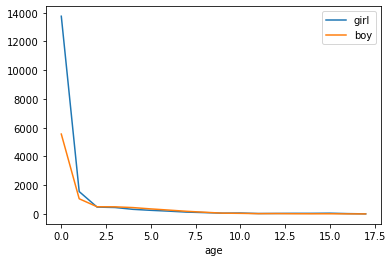

In [20]:
child_age.plot.line(x='age')

## 3 WHEN

### 3.1 Year

In [21]:
child_year=child['失踪年'].groupby(child['失踪年']).agg(Count='count').reset_index()
child_year.head()

,失踪年,Count
0,"1,924.00",1
1,"1,926.00",1
2,"1,927.00",1
3,"1,928.00",2
4,"1,930.00",3


In [22]:
child_year.rename(columns={'失踪年':'year'},inplace=True)

<AxesSubplot:xlabel='year'>

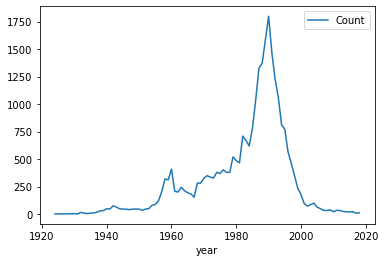

In [23]:
child_year.plot.line(x='year')

### 3.2 Month

In [24]:
child_month=child['失踪月'].groupby(child['失踪月']).agg(Count='count').reset_index()
child_month.head()

,失踪月,Count
0,1.00,3068
1,2.00,2012
2,3.00,2345
3,4.00,2121
4,5.00,2262


In [25]:
child_month.rename(columns={'失踪月':'month'},inplace=True)

<AxesSubplot:xlabel='month'>

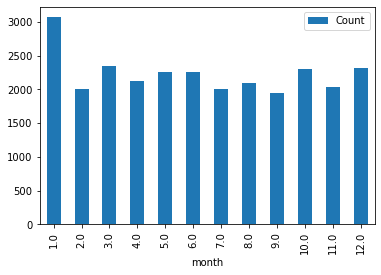

In [26]:
child_month.plot.bar(x='month')

## 4 WHERE

### 4.1 OD flows

### 4.1.1 City level

In [27]:
child_city = child[child["失踪市"] != child["失踪人所在市"]]
child_city.head()

,寻亲编号,性别,出生日期,出生年,出生月,出生日,失踪时身高,失踪日期,失踪年,失踪月,...,失踪人所在省,失踪人所在市,失踪人所在地详情,失踪省,失踪市,失踪地点详情,寻亲者特征描述,其它资料,里面可能含失踪信息,age
0,340386,女,1984/3/4,"1,984.00",3.00,4.00,50.00,1984/3/8,"1,984.00",3.00,...,浙江省,丽水市,NaN,安徽省,亳州市,江西省鹰潭市贵溪市,身上有红色字条应该是出生日,被遗弃,鹰潭市贵溪市,0.00
1,340304,男,1985/2/12,"1,985.00",2.00,12.00,40.00,1985/2/23,"1,985.00",2.00,...,山东省,临沂市,罗庄区傅庄镇,贵州省,贵阳市,安徽省亳州市吕望乡某医院,无,家中有两个哥哥，我是第三子,亳州市吕望乡某医院,0.00
2,340275,女,1998/1/1,"1,998.00",1.00,1.00,NaN,1998/1/1,"1,998.00",1.00,...,贵州省,毕节市,NaN,江西省,鹰潭市,贵州省贵阳市不知,不知,大概出生在97、98年，从小在贵州长大，脸上有疤痕，不知道什么时候留下的,贵阳市不知,0.00
5,340261,男,1989/8/5,"1,989.00",8.00,5.00,NaN,1989/10/1,"1,989.00",10.00,...,河南省,安阳市,NaN,山西省,阳泉市,山西省阳泉市具体地方不知道,长大以后听别人说我是抱养的，不是这边亲生的，对小时候没有任何记忆。,NaN,阳泉市具体地方不知道,0.00
7,340211,男,1993/11/25,"1,993.00",11.00,25.00,NaN,1993/12/31,"1,993.00",12.00,...,山东省,淄博市,NaN,黑龙江省,哈尔滨市,黑龙江省哈尔滨市未知,可能是从医院被抱走的具体不明被抱走时可能就一二个月左右,不明,省哈尔滨市未知,0.00


In [28]:
child_city['OD']=child_city['失踪市']+child_city['失踪人所在市']

/var/folders/pj/2dz1jjvd741c1b_nlybcm2lw0000gn/T/ipykernel_26866/1028367174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_city['OD']=child_city['失踪市']+child_city['失踪人所在市']


In [29]:
city_od=child_city['OD'].groupby(child_city['OD']).agg(Count='count').reset_index()
city_od.head()

,OD,Count
0,七台河市临沂市,1
1,七台河市亳州市,1
2,七台河市哈尔滨市,4
3,七台河市徐州市,2
4,七台河市济南市,1


In [30]:
city_od_sorted = city_od.sort_values(["Count"], ascending=False)
city_od_sorted

,OD,Count
4675,福州市莆田市,297
157,上海市郑州市,66
119,上海市洛阳市,60
1308,合肥市宿州市,57
99,上海市开封市,48
...,...,...
2692,徐州市宁波市,1
2689,徐州市南通市,1
2686,徐州市伊犁哈萨克自治州,1
2682,徐州市三门峡市,1


In [31]:
city_od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6749 entries, 0 to 6748
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   OD      6749 non-null   object
 1   Count   6749 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 105.6+ KB


In [32]:
child_city=pd.merge(child_city,city_od,
                    left_on='OD',
                    right_on='OD',
                    how='left')

In [33]:
child_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16185 entries, 0 to 16184
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   寻亲编号       16185 non-null  int64  
 1   性别         16185 non-null  object 
 2   出生日期       16185 non-null  object 
 3   出生年        16185 non-null  float64
 4   出生月        16185 non-null  float64
 5   出生日        16185 non-null  float64
 6   失踪时身高      6453 non-null   float64
 7   失踪日期       16185 non-null  object 
 8   失踪年        16185 non-null  float64
 9   失踪月        16185 non-null  float64
 10  失踪日        16185 non-null  float64
 11  失踪人所在省     16185 non-null  object 
 12  失踪人所在市     15647 non-null  object 
 13  失踪人所在地详情   201 non-null    object 
 14  失踪省        16185 non-null  object 
 15  失踪市        14765 non-null  object 
 16  失踪地点详情     16181 non-null  object 
 17  寻亲者特征描述    16075 non-null  object 
 18  其它资料       13368 non-null  object 
 19  里面可能含失踪信息  16031 non-null  object 
 20  age   

In [34]:
child_city=child_city.drop_duplicates('OD')

In [35]:
child_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6750 entries, 0 to 16182
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   寻亲编号       6750 non-null   int64  
 1   性别         6750 non-null   object 
 2   出生日期       6750 non-null   object 
 3   出生年        6750 non-null   float64
 4   出生月        6750 non-null   float64
 5   出生日        6750 non-null   float64
 6   失踪时身高      2776 non-null   float64
 7   失踪日期       6750 non-null   object 
 8   失踪年        6750 non-null   float64
 9   失踪月        6750 non-null   float64
 10  失踪日        6750 non-null   float64
 11  失踪人所在省     6750 non-null   object 
 12  失踪人所在市     6749 non-null   object 
 13  失踪人所在地详情   77 non-null     object 
 14  失踪省        6750 non-null   object 
 15  失踪市        6750 non-null   object 
 16  失踪地点详情     6746 non-null   object 
 17  寻亲者特征描述    6709 non-null   object 
 18  其它资料       5199 non-null   object 
 19  里面可能含失踪信息  6732 non-null   object 
 20  age    

In [36]:
child_city_mat = pd.pivot_table(child_city, values='Count', index="失踪市", columns = "失踪人所在市",
                            aggfunc=np.sum, margins=True)
child_city_mat

失踪人所在市,,中卫市,吴忠市,固原市,石嘴山市,通辽市,银川市,七台河市,三亚市,三明市,...,黄冈市,黄山市,黄石市,黑河市,黔东南苗族侗族自治州,黔南布依族苗族自治州,黔西南布依族苗族自治州,齐齐哈尔市,龙岩市,All
失踪市,,,,,,,,,,,,,,,,,,,,,
七台河市,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.00
三亚市,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
三明市,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.00
三门峡市,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.00
上海市,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,766.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
黔南布依族苗族自治州,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,15.00
黔西南布依族苗族自治州,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.00
齐齐哈尔市,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,NaN,...,NaN,NaN,NaN,2.00,NaN,NaN,NaN,NaN,NaN,51.00


### 4.1.2 Province level

In [37]:
child_province = child[child["失踪省"] != child["失踪人所在省"]]
child_province.head()

,寻亲编号,性别,出生日期,出生年,出生月,出生日,失踪时身高,失踪日期,失踪年,失踪月,...,失踪人所在省,失踪人所在市,失踪人所在地详情,失踪省,失踪市,失踪地点详情,寻亲者特征描述,其它资料,里面可能含失踪信息,age
0,340386,女,1984/3/4,"1,984.00",3.00,4.00,50.00,1984/3/8,"1,984.00",3.00,...,浙江省,丽水市,NaN,安徽省,亳州市,江西省鹰潭市贵溪市,身上有红色字条应该是出生日,被遗弃,鹰潭市贵溪市,0.00
1,340304,男,1985/2/12,"1,985.00",2.00,12.00,40.00,1985/2/23,"1,985.00",2.00,...,山东省,临沂市,罗庄区傅庄镇,贵州省,贵阳市,安徽省亳州市吕望乡某医院,无,家中有两个哥哥，我是第三子,亳州市吕望乡某医院,0.00
2,340275,女,1998/1/1,"1,998.00",1.00,1.00,NaN,1998/1/1,"1,998.00",1.00,...,贵州省,毕节市,NaN,江西省,鹰潭市,贵州省贵阳市不知,不知,大概出生在97、98年，从小在贵州长大，脸上有疤痕，不知道什么时候留下的,贵阳市不知,0.00
5,340261,男,1989/8/5,"1,989.00",8.00,5.00,NaN,1989/10/1,"1,989.00",10.00,...,河南省,安阳市,NaN,山西省,阳泉市,山西省阳泉市具体地方不知道,长大以后听别人说我是抱养的，不是这边亲生的，对小时候没有任何记忆。,NaN,阳泉市具体地方不知道,0.00
7,340211,男,1993/11/25,"1,993.00",11.00,25.00,NaN,1993/12/31,"1,993.00",12.00,...,山东省,淄博市,NaN,黑龙江省,哈尔滨市,黑龙江省哈尔滨市未知,可能是从医院被抱走的具体不明被抱走时可能就一二个月左右,不明,省哈尔滨市未知,0.00


In [38]:
child_province['OD2']=child_province['失踪省']+child_province['失踪人所在省']
child_province.head()

/var/folders/pj/2dz1jjvd741c1b_nlybcm2lw0000gn/T/ipykernel_26866/3399240498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_province['OD2']=child_province['失踪省']+child_province['失踪人所在省']


,寻亲编号,性别,出生日期,出生年,出生月,出生日,失踪时身高,失踪日期,失踪年,失踪月,...,失踪人所在市,失踪人所在地详情,失踪省,失踪市,失踪地点详情,寻亲者特征描述,其它资料,里面可能含失踪信息,age,OD2
0,340386,女,1984/3/4,"1,984.00",3.00,4.00,50.00,1984/3/8,"1,984.00",3.00,...,丽水市,NaN,安徽省,亳州市,江西省鹰潭市贵溪市,身上有红色字条应该是出生日,被遗弃,鹰潭市贵溪市,0.00,安徽省浙江省
1,340304,男,1985/2/12,"1,985.00",2.00,12.00,40.00,1985/2/23,"1,985.00",2.00,...,临沂市,罗庄区傅庄镇,贵州省,贵阳市,安徽省亳州市吕望乡某医院,无,家中有两个哥哥，我是第三子,亳州市吕望乡某医院,0.00,贵州省山东省
2,340275,女,1998/1/1,"1,998.00",1.00,1.00,NaN,1998/1/1,"1,998.00",1.00,...,毕节市,NaN,江西省,鹰潭市,贵州省贵阳市不知,不知,大概出生在97、98年，从小在贵州长大，脸上有疤痕，不知道什么时候留下的,贵阳市不知,0.00,江西省贵州省
5,340261,男,1989/8/5,"1,989.00",8.00,5.00,NaN,1989/10/1,"1,989.00",10.00,...,安阳市,NaN,山西省,阳泉市,山西省阳泉市具体地方不知道,长大以后听别人说我是抱养的，不是这边亲生的，对小时候没有任何记忆。,NaN,阳泉市具体地方不知道,0.00,山西省河南省
7,340211,男,1993/11/25,"1,993.00",11.00,25.00,NaN,1993/12/31,"1,993.00",12.00,...,淄博市,NaN,黑龙江省,哈尔滨市,黑龙江省哈尔滨市未知,可能是从医院被抱走的具体不明被抱走时可能就一二个月左右,不明,省哈尔滨市未知,0.00,黑龙江省山东省


In [39]:
province_od=child_province['OD2'].groupby(child_province['OD2']).agg(Count2='count').reset_index()
province_od.head()

,OD2,Count2
0,河南省河南省,1
1,上海市,1
2,四川省四川省,2
3,安徽省,1
4,山东省山东省,1


In [40]:
province_od_sorted = province_od.sort_values(["Count2"], ascending=False)
province_od_sorted

,OD2,Count2
419,江苏省山东省,428
426,江苏省河南省,400
32,上海市河南省,350
323,山西省河北省,317
537,浙江省山东省,304
...,...,...
438,江西省 江西省,1
1,上海市,1
409,江苏省云南省,1
407,新疆维吾尔自治区青海省,1


In [41]:
child_province=pd.merge(child_province,province_od,
                    left_on='OD2',
                    right_on='OD2',
                    how='left')

In [42]:
child_province.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11610 entries, 0 to 11609
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   寻亲编号       11610 non-null  int64  
 1   性别         11610 non-null  object 
 2   出生日期       11610 non-null  object 
 3   出生年        11610 non-null  float64
 4   出生月        11610 non-null  float64
 5   出生日        11610 non-null  float64
 6   失踪时身高      4727 non-null   float64
 7   失踪日期       11610 non-null  object 
 8   失踪年        11610 non-null  float64
 9   失踪月        11610 non-null  float64
 10  失踪日        11610 non-null  float64
 11  失踪人所在省     11610 non-null  object 
 12  失踪人所在市     11225 non-null  object 
 13  失踪人所在地详情   139 non-null    object 
 14  失踪省        11610 non-null  object 
 15  失踪市        10635 non-null  object 
 16  失踪地点详情     11606 non-null  object 
 17  寻亲者特征描述    11533 non-null  object 
 18  其它资料       9560 non-null   object 
 19  里面可能含失踪信息  11497 non-null  object 
 20  age   

In [43]:
child_province=child_province.drop_duplicates('OD2')

In [44]:
child_province.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 11552
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   寻亲编号       844 non-null    int64  
 1   性别         844 non-null    object 
 2   出生日期       844 non-null    object 
 3   出生年        844 non-null    float64
 4   出生月        844 non-null    float64
 5   出生日        844 non-null    float64
 6   失踪时身高      358 non-null    float64
 7   失踪日期       844 non-null    object 
 8   失踪年        844 non-null    float64
 9   失踪月        844 non-null    float64
 10  失踪日        844 non-null    float64
 11  失踪人所在省     844 non-null    object 
 12  失踪人所在市     762 non-null    object 
 13  失踪人所在地详情   18 non-null     object 
 14  失踪省        844 non-null    object 
 15  失踪市        775 non-null    object 
 16  失踪地点详情     843 non-null    object 
 17  寻亲者特征描述    841 non-null    object 
 18  其它资料       551 non-null    object 
 19  里面可能含失踪信息  836 non-null    object 
 20  age     

In [45]:
child_province_mat = pd.pivot_table(child_province, values='Count2', index="失踪省", columns = "失踪人所在省",
                            aggfunc=np.sum, margins=True)
child_province_mat

失踪人所在省,天津市,新疆维吾尔自治区,江西省,浙江省,福建省,上海市,云南省,其它亚洲,其它大洋洲,其它欧洲,...,西藏自治区,贵州省,辽宁省,重庆市,陕西省,青海省,香港特别行政区,香港特别行政区,黑龙江省,All
失踪省,,,,,,,,,,,,,,,,,,,,,
,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
河南省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
四川省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
山东省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
江西省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
河北省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
河南省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
浙江省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
甘肃省,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


### 4.2 O & D

### 4.2.1 Province level

### ori

In [47]:
province_ori=child['失踪省'].groupby(child['失踪省']).agg(Count='count').reset_index()
province_ori.head()

,失踪省,Count
0,,8
1,河南省,1
2,四川省,2
3,山东省,1
4,江西省,1


In [48]:
province_ori.describe()

,Count
count,48.00
mean,557.71
std,664.60
min,1.00
25%,2.00
50%,368.00
75%,920.75
max,"2,835.00"


In [50]:
map_province = gpd.read_file('map/省.shp')
map_province.head()

,省代码,省,类型,geometry
0,110000,北京市,直辖市,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
1,120000,天津市,直辖市,"POLYGON ((117.44383 40.25101, 117.45611 40.246..."
2,130000,河北省,省,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ..."
3,140000,山西省,省,"POLYGON ((114.13714 40.73445, 114.13860 40.732..."
4,150000,内蒙古自治区,自治区,"POLYGON ((121.49813 53.32607, 121.50116 53.321..."


<AxesSubplot:>

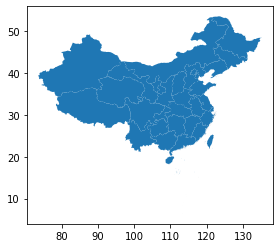

In [51]:
map_province.plot()

In [52]:
province_ori_map=pd.merge(province_ori,map_province,
                  left_on='失踪省',
                  right_on='省',
                  how='left')
province_ori_map.head()

,失踪省,Count,省代码,省,类型,geometry
0,,8,NaN,NaN,NaN,None
1,河南省,1,NaN,NaN,NaN,None
2,四川省,2,NaN,NaN,NaN,None
3,山东省,1,NaN,NaN,NaN,None
4,江西省,1,NaN,NaN,NaN,None


In [53]:
from geopandas import GeoDataFrame

province_ori_map = GeoDataFrame(province_ori_map)

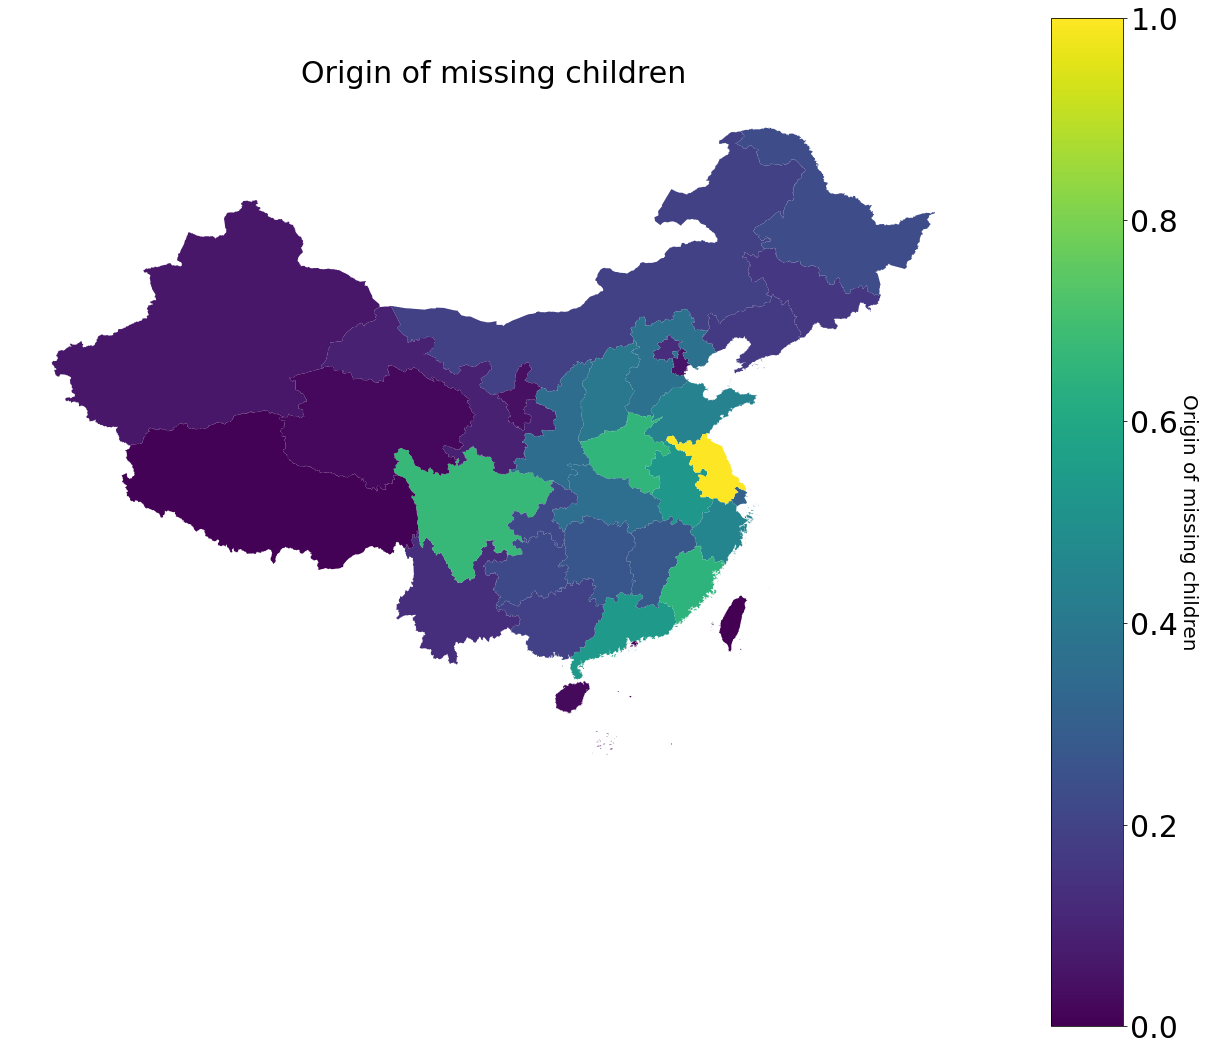

In [54]:
# create a subplot axis, given that we have 4 different years this has to be a 2 by 2 matrix of plots
fig, ax = plt.subplots(1,1, figsize = (20,20))


# plot the map using the viridis color map
list_plt = province_ori_map.plot(column = 'Count', ax=ax, cmap = "viridis")
# remove the axis so that it looks cleaner
ax.set_axis_off()
# set the plot title as the column name
ax.set_title('Origin of missing children', fontsize = 30)

# adding a color bar for the overall plot
# https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots/11558629#11558629
#vmin, vmax = 0,500
# create a subaxis within the figure
fig = ax.get_figure()
plt.subplots_adjust(right = 0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7], label = "Origin of missing children")
# create a colorbar and plot it
sm = plt.cm.ScalarMappable(cmap='viridis')
sm._A = []
cb = fig.colorbar(sm, cax=cax)
# change the size of the tick parameters
cb.ax.tick_params(labelsize = 30)
# set the label title
# https://stackoverflow.com/questions/17475619/how-do-i-adjust-offset-colorbar-title-in-matplotlib
cb.set_label("Origin of missing children", rotation = 270, fontsize= 20, labelpad = 20)

# show the results
plt.show()

### des

In [56]:
province_des=child['失踪人所在省'].groupby(child['失踪人所在省']).agg(Count='count').reset_index()
province_des.head()

,失踪人所在省,Count
0,天津市,1
1,新疆维吾尔自治区,1
2,江西省,1
3,浙江省,1
4,福建省,1


In [57]:
province_des_map=pd.merge(province_des,map_province,
                  left_on='失踪人所在省',
                  right_on='省',
                  how='left')
province_des_map.head()

,失踪人所在省,Count,省代码,省,类型,geometry
0,天津市,1,NaN,NaN,NaN,None
1,新疆维吾尔自治区,1,NaN,NaN,NaN,None
2,江西省,1,NaN,NaN,NaN,None
3,浙江省,1,NaN,NaN,NaN,None
4,福建省,1,NaN,NaN,NaN,None


In [58]:
province_des_map = GeoDataFrame(province_des_map)

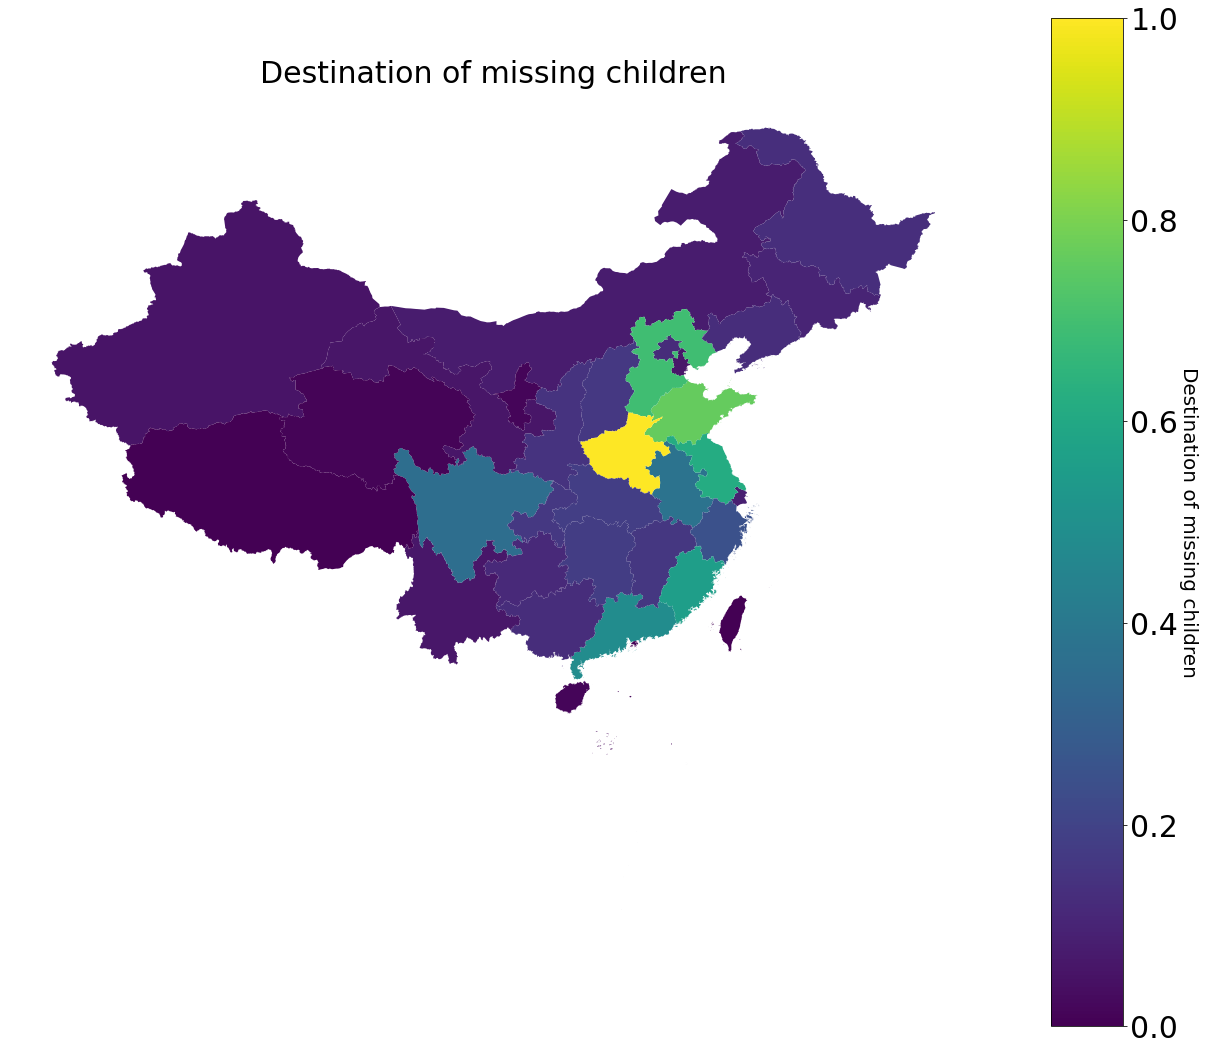

In [59]:
# create a subplot axis, given that we have 4 different years this has to be a 2 by 2 matrix of plots
fig, ax = plt.subplots(1,1, figsize = (20,20))


# plot the map using the viridis color map
list_plt = province_des_map.plot(column = 'Count', ax=ax, cmap = "viridis")
# remove the axis so that it looks cleaner
ax.set_axis_off()
# set the plot title as the column name
ax.set_title('Destination of missing children', fontsize = 30)

# adding a color bar for the overall plot
# https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots/11558629#11558629
#vmin, vmax = 0,500
# create a subaxis within the figure
fig = ax.get_figure()
plt.subplots_adjust(right = 0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7], label = "Destination of missing children")
# create a colorbar and plot it
sm = plt.cm.ScalarMappable(cmap='viridis')
sm._A = []
cb = fig.colorbar(sm, cax=cax)
# change the size of the tick parameters
cb.ax.tick_params(labelsize = 30)
# set the label title
# https://stackoverflow.com/questions/17475619/how-do-i-adjust-offset-colorbar-title-in-matplotlib
cb.set_label("Destination of missing children", rotation = 270, fontsize= 20, labelpad = 20)

# show the results
plt.show()

### 4.2.2 City level

### ori

In [61]:
city_ori=child['失踪市'].groupby(child['失踪市']).agg(Count='count').reset_index()
city_ori.head()

,失踪市,Count
0,七台河市,22
1,三亚市,13
2,三明市,100
3,三门峡市,45
4,上海市,893


In [62]:
#city_ori.to_csv('city_ori.csv')

In [63]:
city_ori_sorted = city_ori.sort_values(["Count"], ascending=False)
city_ori_sorted

,失踪市,Count
4,上海市,893
134,成都市,646
288,重庆市,610
234,福州市,593
249,莆田市,568
...,...,...
59,吐鲁番市,1
148,昆山市,1
146,日喀则市,1
78,塔城地区,1


In [64]:
map_city = gpd.read_file('map/city.shp')
map_city.head()

,省代码,省,市代码,市,类型,geometry
0,110000,北京市,110000,北京市,直辖市,"POLYGON ((116.67527 41.04010, 116.67616 41.040..."
1,120000,天津市,120000,天津市,直辖市,"POLYGON ((117.44383 40.25101, 117.45611 40.246..."
2,130000,河北省,130100,石家庄市,地级市,"POLYGON ((113.82422 38.75805, 113.83120 38.748..."
3,130000,河北省,130200,唐山市,地级市,"MULTIPOLYGON (((118.85390 39.10692, 118.84934 ..."
4,130000,河北省,130300,秦皇岛市,地级市,"POLYGON ((119.15209 40.61280, 119.15165 40.609..."


<AxesSubplot:>

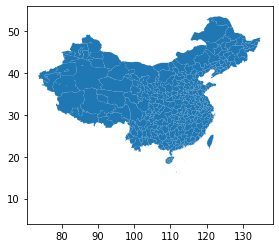

In [65]:
map_city.plot()

In [66]:
city_ori_map=pd.merge(city_ori,map_city,
                  left_on='失踪市',
                  right_on='市',
                  how='left')
city_ori_map.head()

,失踪市,Count,省代码,省,市代码,市,类型,geometry
0,七台河市,22,"230,000.00",黑龙江省,"230,900.00",七台河市,地级市,"POLYGON ((131.27322 46.32068, 131.27301 46.320..."
1,三亚市,13,"460,000.00",海南省,"460,200.00",三亚市,地级市,"MULTIPOLYGON (((109.69940 18.18435, 109.69782 ..."
2,三明市,100,"350,000.00",福建省,"350,400.00",三明市,地级市,"POLYGON ((117.30633 27.11907, 117.31564 27.117..."
3,三门峡市,45,"410,000.00",河南省,"411,200.00",三门峡市,地级市,"POLYGON ((111.96644 35.07208, 111.96662 35.071..."
4,上海市,893,"310,000.00",上海市,"310,000.00",上海市,直辖市,"POLYGON ((121.45849 31.75982, 121.45930 31.759..."


In [67]:
city_ori_map = GeoDataFrame(city_ori_map)

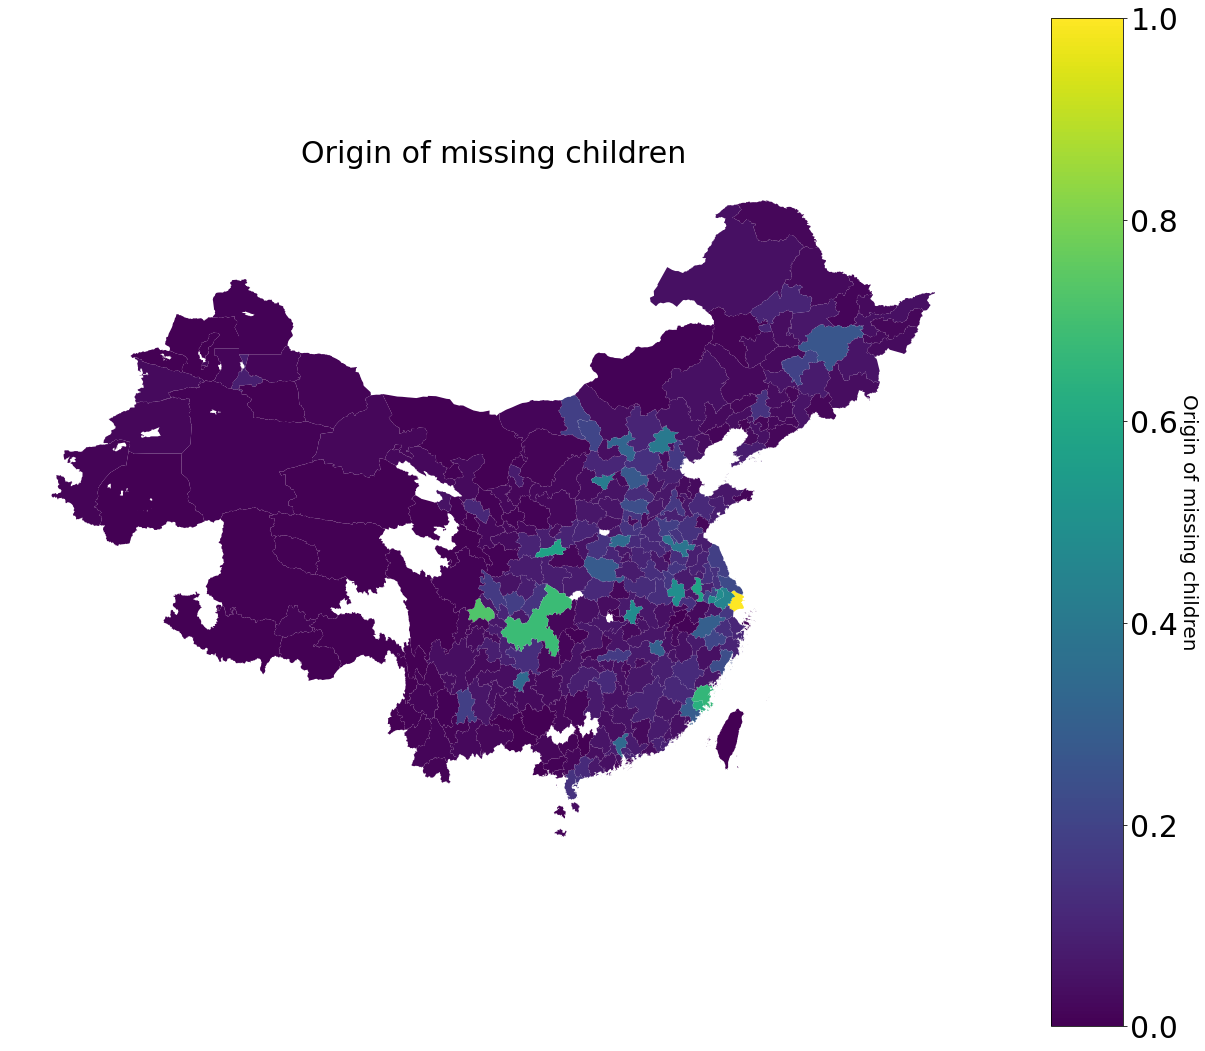

In [68]:
# create a subplot axis, given that we have 4 different years this has to be a 2 by 2 matrix of plots
fig, ax = plt.subplots(1,1, figsize = (20,20))


# plot the map using the viridis color map
list_plt = city_ori_map.plot(column = 'Count', ax=ax, cmap = "viridis")
# remove the axis so that it looks cleaner
ax.set_axis_off()
# set the plot title as the column name
ax.set_title('Origin of missing children', fontsize = 30)

# adding a color bar for the overall plot
# https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots/11558629#11558629
#vmin, vmax = 0,500
# create a subaxis within the figure
fig = ax.get_figure()
plt.subplots_adjust(right = 0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7], label = "Origin of missing children")
# create a colorbar and plot it
sm = plt.cm.ScalarMappable(cmap='viridis')
sm._A = []
cb = fig.colorbar(sm, cax=cax)
# change the size of the tick parameters
cb.ax.tick_params(labelsize = 30)
# set the label title
# https://stackoverflow.com/questions/17475619/how-do-i-adjust-offset-colorbar-title-in-matplotlib
cb.set_label("Origin of missing children", rotation = 270, fontsize= 20, labelpad = 20)

# show the results
plt.show()

### des

In [70]:
city_des=child['失踪人所在市'].groupby(child['失踪人所在市']).agg(Count='count').reset_index()
city_des.head()

,失踪人所在市,Count
0,,1
1,中卫市,10
2,吴忠市,4
3,固原市,2
4,石嘴山市,5


In [71]:
city_des_sorted = city_des.sort_values(["Count"], ascending=False)
city_des_sorted

,失踪人所在市,Count
252,莆田市,882
129,徐州市,688
284,邯郸市,670
291,重庆市,593
286,郑州市,567
...,...,...
196,海南藏族自治州,1
198,海西蒙古族藏族自治州,1
234,石嘴山市,1
82,固原市,1


In [72]:
city_des_map=pd.merge(city_des,map_city,
                  left_on='失踪人所在市',
                  right_on='市',
                  how='left')
city_des_map.head()

,失踪人所在市,Count,省代码,省,市代码,市,类型,geometry
0,,1,NaN,NaN,NaN,NaN,NaN,None
1,中卫市,10,NaN,NaN,NaN,NaN,NaN,None
2,吴忠市,4,NaN,NaN,NaN,NaN,NaN,None
3,固原市,2,NaN,NaN,NaN,NaN,NaN,None
4,石嘴山市,5,NaN,NaN,NaN,NaN,NaN,None


In [73]:
city_des_map = GeoDataFrame(city_des_map)

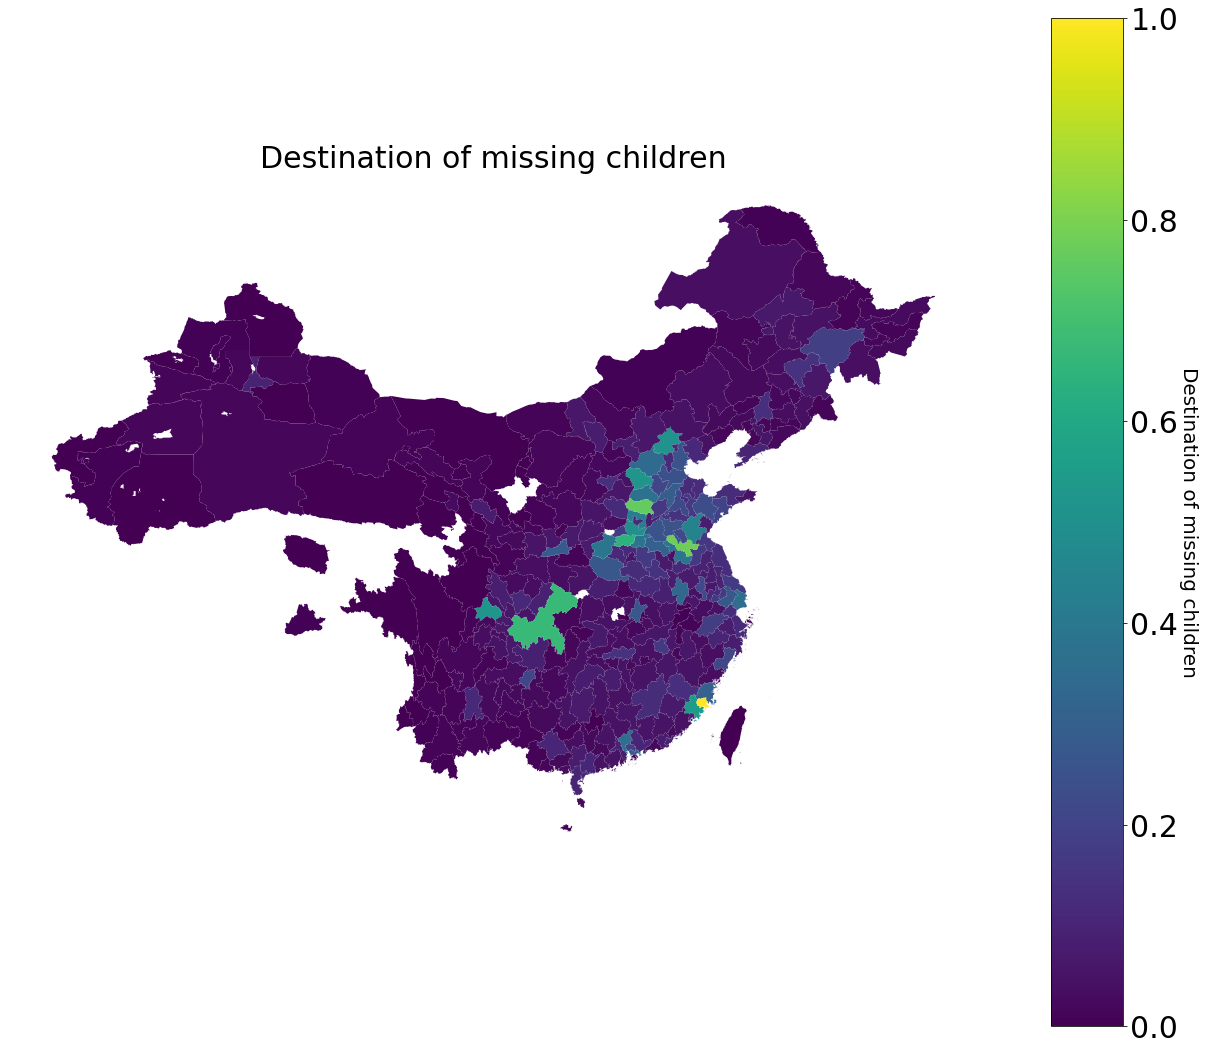

In [74]:
# create a subplot axis, given that we have 4 different years this has to be a 2 by 2 matrix of plots
fig, ax = plt.subplots(1,1, figsize = (20,20))


# plot the map using the viridis color map
list_plt = city_des_map.plot(column = 'Count', ax=ax, cmap = "viridis")
# remove the axis so that it looks cleaner
ax.set_axis_off()
# set the plot title as the column name
ax.set_title('Destination of missing children', fontsize = 30)

# adding a color bar for the overall plot
# https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots/11558629#11558629
#vmin, vmax = 0,500
# create a subaxis within the figure
fig = ax.get_figure()
plt.subplots_adjust(right = 0.8)
cax = fig.add_axes([0.85, 0.15, 0.05, 0.7], label = "Destination of missing children")
# create a colorbar and plot it
sm = plt.cm.ScalarMappable(cmap='viridis')
sm._A = []
cb = fig.colorbar(sm, cax=cax)
# change the size of the tick parameters
cb.ax.tick_params(labelsize = 30)
# set the label title
# https://stackoverflow.com/questions/17475619/how-do-i-adjust-offset-colorbar-title-in-matplotlib
cb.set_label("Destination of missing children", rotation = 270, fontsize= 20, labelpad = 20)

# show the results
plt.show()

## Data Cleaning for WHEN part


```python
import pandas as pd
```


```python
df=pd.read_csv('OD.csv') 
```


```python
df.sample(10)
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Sex</th>
      <th>D</th>
      <th>O</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>14009</th>
      <td>男</td>
      <td>福建省</td>
      <td>辽宁省</td>
    </tr>
    <tr>
      <th>26166</th>
      <td>女</td>
      <td>安徽省</td>
      <td>四川省</td>
    </tr>
    <tr>
      <th>4024</th>
      <td>女</td>
      <td>广东省</td>
      <td>广东省</td>
    </tr>
    <tr>
      <th>15506</th>
      <td>女</td>
      <td>安徽省</td>
      <td>安徽省</td>
    </tr>
    <tr>
      <th>33176</th>
      <td>女</td>
      <td>NaN</td>
      <td>福建省</td>
    </tr>
    <tr>
      <th>22360</th>
      <td>男</td>
      <td>湖北省</td>
      <td>江苏省</td>
    </tr>
    <tr>
      <th>22098</th>
      <td>女</td>
      <td>福建省</td>
      <td>福建省</td>
    </tr>
    <tr>
      <th>11505</th>
      <td>女</td>
      <td>黑龙江省</td>
      <td>黑龙江省</td>
    </tr>
    <tr>
      <th>32736</th>
      <td>男</td>
      <td>NaN</td>
      <td>江西省</td>
    </tr>
    <tr>
      <th>5131</th>
      <td>女</td>
      <td>江西省</td>
      <td>其它亚洲</td>
    </tr>
  </tbody>
</table>
</div>




```python
df.info()
```

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 35157 entries, 0 to 35156
    Data columns (total 3 columns):
     #   Column  Non-Null Count  Dtype 
    ---  ------  --------------  ----- 
     0   Sex     35157 non-null  object
     1   D       32182 non-null  object
     2   O       29087 non-null  object
    dtypes: object(3)
    memory usage: 824.1+ KB



```python
df['O'] = df['O'].replace(['  河南省'],'河南省')
df['O'] = df['O'].replace([' 四川省'],'四川省')
df['O'] = df['O'].replace([' 山东省'],'山东省')  
df['O'] = df['O'].replace([' 江西省'],'江西省')  
df['O'] = df['O'].replace([' 河北省'],'河北省')
df['O'] = df['O'].replace([' 河南省'],'河南省')
df['O'] = df['O'].replace([' 浙江省'],'浙江省')
df['O'] = df['O'].replace([' 甘肃省'],'甘肃省')
df['O'] = df['O'].replace([' 陕西省'],'陕西省')
df['O'] = df['O'].replace([' ','山区'],'未知')
df['O'] = df['O'].replace(['其它亚洲','其它欧洲','其它美洲','其它非洲'],'海外')
df['D'] = df['D'].replace(['北京市 '],'北京市')
df['D'] = df['D'].replace(['上海'],'上海市')
df['D'] = df['D'].replace(['重庆'],'重庆市')
df['D'] = df['D'].replace(['广东省 '],'广东省')
df['D'] = df['D'].replace(['香港 '],'香港')
df['D'] = df['D'].replace([' 天津市'],'天津市')
df['D'] = df['D'].replace([' 广东省'],'广东省')
df['D'] = df['D'].replace([' 新疆维吾尔自治区'],'新疆维吾尔自治区')  
df['D'] = df['D'].replace([' 江西省'],'江西省')  
df['D'] = df['D'].replace([' 福建省'],'福建省')
df['D'] = df['D'].replace([' 浙江省'],'浙江省')
df['D'] = df['D'].replace(['香港特别行政区 '],'香港特别行政区')
df['D'] = df['D'].replace(['其它大洋洲','其它美国','其它亚洲','其它欧洲','其它美洲','其它非洲'],'海外')
```


```python
prov = df.groupby('失踪人所在省')
prov.groups.keys()
prov=list(prov.groups)
prov
```




    ['上海市',
     '云南省',
     '内蒙古自治区',
     '北京市',
     '台湾省',
     '吉林省',
     '四川省',
     '天津市',
     '宁夏回族自治区',
     '安徽省',
     '山东省',
     '山西省',
     '广东省',
     '广西壮族自治区',
     '新疆维吾尔自治区',
     '江苏省',
     '江西省',
     '河北省',
     '河南省',
     '浙江省',
     '海南省',
     '海外',
     '湖北省',
     '湖南省',
     '甘肃省',
     '福建省',
     '西藏自治区',
     '贵州省',
     '辽宁省',
     '重庆市',
     '陕西省',
     '青海省',
     '香港特别行政区',
     '黑龙江省']




```python
df.to_csv('OD.csv',encoding='utf_8_sig')
```


```python
year = df.groupby('失踪年')
year.groups.keys()
year=list(year.groups)
```


```python
year
```




    [1920,
     1924,
     1926,
     1927,
     1928,
     1930,
     1931,
     1932,
     1933,
     1934,
     1935,
     1936,
     1937,
     1938,
     1939,
     1940,
     1941,
     1942,
     1943,
     1944,
     1945,
     1946,
     1947,
     1948,
     1949,
     1950,
     1951,
     1952,
     1953,
     1954,
     1955,
     1956,
     1957,
     1958,
     1959,
     1960,
     1961,
     1962,
     1963,
     1964,
     1965,
     1966,
     1967,
     1968,
     1969,
     1970,
     1971,
     1972,
     1973,
     1974,
     1975,
     1976,
     1977,
     1978,
     1979,
     1980,
     1981,
     1982,
     1983,
     1984,
     1985,
     1986,
     1987,
     1988,
     1989,
     1990,
     1991,
     1992,
     1993,
     1994,
     1995,
     1996,
     1997,
     1998,
     1999,
     2000,
     2001,
     2002,
     2003,
     2004,
     2005,
     2006,
     2007,
     2008,
     2009,
     2010,
     2011,
     2012,
     2013,
     2014,
     2015,
     2016,
     2017,
     2018]




```python
missing_count_origin_f=df.loc[df['性别'] == '女']
missing_count_origin_f
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>性别</th>
      <th>失踪年</th>
      <th>失踪人所在省</th>
      <th>失踪人所在市</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>女</td>
      <td>1984</td>
      <td>浙江省</td>
      <td>丽水市</td>
    </tr>
    <tr>
      <th>2</th>
      <td>女</td>
      <td>1998</td>
      <td>贵州省</td>
      <td>毕节市</td>
    </tr>
    <tr>
      <th>3</th>
      <td>女</td>
      <td>1982</td>
      <td>湖南省</td>
      <td>邵阳市</td>
    </tr>
    <tr>
      <th>7</th>
      <td>女</td>
      <td>1995</td>
      <td>四川省</td>
      <td>内江市</td>
    </tr>
    <tr>
      <th>8</th>
      <td>女</td>
      <td>1998</td>
      <td>贵州省</td>
      <td>遵义市</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>35151</th>
      <td>女</td>
      <td>1979</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>35152</th>
      <td>女</td>
      <td>1984</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>35153</th>
      <td>女</td>
      <td>1977</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>35154</th>
      <td>女</td>
      <td>1979</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>35156</th>
      <td>女</td>
      <td>1979</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
<p>22001 rows × 4 columns</p>
</div>




```python
missing_count_origin_m=df.loc[df['性别'] == '男']
missing_count_origin_m
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>性别</th>
      <th>失踪年</th>
      <th>失踪人所在省</th>
      <th>失踪人所在市</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>男</td>
      <td>1985</td>
      <td>山东省</td>
      <td>临沂市</td>
    </tr>
    <tr>
      <th>4</th>
      <td>男</td>
      <td>1989</td>
      <td>河南省</td>
      <td>安阳市</td>
    </tr>
    <tr>
      <th>5</th>
      <td>男</td>
      <td>1994</td>
      <td>福建省</td>
      <td>泉州市</td>
    </tr>
    <tr>
      <th>6</th>
      <td>男</td>
      <td>1993</td>
      <td>山东省</td>
      <td>淄博市</td>
    </tr>
    <tr>
      <th>13</th>
      <td>男</td>
      <td>1982</td>
      <td>河南省</td>
      <td>驻马店市</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>35139</th>
      <td>男</td>
      <td>1971</td>
      <td>浙江省</td>
      <td>金华市</td>
    </tr>
    <tr>
      <th>35147</th>
      <td>男</td>
      <td>1976</td>
      <td>吉林省</td>
      <td>长春市</td>
    </tr>
    <tr>
      <th>35148</th>
      <td>男</td>
      <td>1997</td>
      <td>广东省</td>
      <td>汕头市</td>
    </tr>
    <tr>
      <th>35149</th>
      <td>男</td>
      <td>1998</td>
      <td>河南省</td>
      <td>濮阳市</td>
    </tr>
    <tr>
      <th>35155</th>
      <td>男</td>
      <td>1970</td>
      <td>吉林省</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
<p>13152 rows × 4 columns</p>
</div>




```python
missing_count_origin=missing_count_origin_f.merge(missing_count_origin_m, on='失踪人所在市', how='left')
missing_count_origin
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>性别_x</th>
      <th>失踪年_x</th>
      <th>失踪人所在省_x</th>
      <th>失踪人所在市</th>
      <th>性别_y</th>
      <th>失踪年_y</th>
      <th>失踪人所在省_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>女</td>
      <td>1984</td>
      <td>浙江省</td>
      <td>丽水市</td>
      <td>男</td>
      <td>1996.0</td>
      <td>浙江省</td>
    </tr>
    <tr>
      <th>1</th>
      <td>女</td>
      <td>1984</td>
      <td>浙江省</td>
      <td>丽水市</td>
      <td>男</td>
      <td>1990.0</td>
      <td>浙江省</td>
    </tr>
    <tr>
      <th>2</th>
      <td>女</td>
      <td>1984</td>
      <td>浙江省</td>
      <td>丽水市</td>
      <td>男</td>
      <td>1976.0</td>
      <td>浙江省</td>
    </tr>
    <tr>
      <th>3</th>
      <td>女</td>
      <td>1984</td>
      <td>浙江省</td>
      <td>丽水市</td>
      <td>男</td>
      <td>1989.0</td>
      <td>浙江省</td>
    </tr>
    <tr>
      <th>4</th>
      <td>女</td>
      <td>1998</td>
      <td>贵州省</td>
      <td>毕节市</td>
      <td>男</td>
      <td>1974.0</td>
      <td>贵州省</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>5347105</th>
      <td>女</td>
      <td>1979</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>男</td>
      <td>1981.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5347106</th>
      <td>女</td>
      <td>1979</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>男</td>
      <td>1987.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5347107</th>
      <td>女</td>
      <td>1979</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>男</td>
      <td>1978.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5347108</th>
      <td>女</td>
      <td>1979</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>男</td>
      <td>1987.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5347109</th>
      <td>女</td>
      <td>1979</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>男</td>
      <td>1970.0</td>
      <td>吉林省</td>
    </tr>
  </tbody>
</table>
<p>5347110 rows × 7 columns</p>
</div>




```python
missing_count_origin_f=missing_count_origin_f.groupby(["失踪人所在省",'失踪年'], as_index=True).agg({"性别": [("female","count")]})
missing_count_origin_f
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th>性别</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>female</th>
    </tr>
    <tr>
      <th>失踪人所在省</th>
      <th>失踪年</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">上海市</th>
      <th>1940</th>
      <td>2</td>
    </tr>
    <tr>
      <th>1948</th>
      <td>1</td>
    </tr>
    <tr>
      <th>1949</th>
      <td>1</td>
    </tr>
    <tr>
      <th>1951</th>
      <td>1</td>
    </tr>
    <tr>
      <th>1952</th>
      <td>2</td>
    </tr>
    <tr>
      <th>...</th>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">黑龙江省</th>
      <th>2000</th>
      <td>3</td>
    </tr>
    <tr>
      <th>2004</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2005</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2010</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2018</th>
      <td>1</td>
    </tr>
  </tbody>
</table>
<p>1725 rows × 1 columns</p>
</div>




```python
missing_count_origin_m=missing_count_origin_m.groupby(["失踪人所在省",'失踪年'], as_index=True).agg({"性别": [("male","count")]})
missing_count_origin_m
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th></th>
      <th>性别</th>
    </tr>
    <tr>
      <th></th>
      <th></th>
      <th>male</th>
    </tr>
    <tr>
      <th>失踪人所在省</th>
      <th>失踪年</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">上海市</th>
      <th>1951</th>
      <td>1</td>
    </tr>
    <tr>
      <th>1952</th>
      <td>1</td>
    </tr>
    <tr>
      <th>1954</th>
      <td>1</td>
    </tr>
    <tr>
      <th>1955</th>
      <td>1</td>
    </tr>
    <tr>
      <th>1957</th>
      <td>1</td>
    </tr>
    <tr>
      <th>...</th>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">黑龙江省</th>
      <th>2002</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2003</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2004</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2007</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2010</th>
      <td>1</td>
    </tr>
  </tbody>
</table>
<p>1587 rows × 1 columns</p>
</div>




```python
missing_count_origin
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead tr th {
        text-align: left;
    }

    .dataframe thead tr:last-of-type th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th colspan="2" halign="left">性别</th>
    </tr>
    <tr>
      <th></th>
      <th>female</th>
      <th>male</th>
    </tr>
    <tr>
      <th>失踪人所在省</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>上海市</th>
      <td>2</td>
      <td>1</td>
    </tr>
    <tr>
      <th>上海市</th>
      <td>2</td>
      <td>1</td>
    </tr>
    <tr>
      <th>上海市</th>
      <td>2</td>
      <td>1</td>
    </tr>
    <tr>
      <th>上海市</th>
      <td>2</td>
      <td>1</td>
    </tr>
    <tr>
      <th>上海市</th>
      <td>2</td>
      <td>1</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>黑龙江省</th>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>黑龙江省</th>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>黑龙江省</th>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>黑龙江省</th>
      <td>1</td>
      <td>1</td>
    </tr>
    <tr>
      <th>黑龙江省</th>
      <td>1</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
<p>95189 rows × 2 columns</p>
</div>




```python
missing_count_origin_f.to_csv('missing_count_origin_f.csv',encoding='utf_8_sig')
```


```python
missing_count_origin_m.to_csv('missing_count_origin_m.csv',encoding='utf_8_sig')
```


```python
df1=pd.read_csv('missing_count_destination.csv',index_col=0) 
```


```python
df1
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>失踪年</th>
      <th>性别</th>
    </tr>
    <tr>
      <th>失踪人所在省</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>上海</th>
      <td>1940.0</td>
      <td>2</td>
    </tr>
    <tr>
      <th>上海</th>
      <td>1948.0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>上海</th>
      <td>1949.0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>上海</th>
      <td>1951.0</td>
      <td>2</td>
    </tr>
    <tr>
      <th>上海</th>
      <td>1952.0</td>
      <td>3</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>黑龙江</th>
      <td>2005.0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>黑龙江</th>
      <td>2007.0</td>
      <td>1</td>
    </tr>
    <tr>
      <th>黑龙江</th>
      <td>2010.0</td>
      <td>2</td>
    </tr>
    <tr>
      <th>黑龙江</th>
      <td>2016.0</td>
      <td>2</td>
    </tr>
    <tr>
      <th>黑龙江</th>
      <td>2018.0</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
<p>2022 rows × 2 columns</p>
</div>




```python
date=pd.read_csv('date.csv',index_col=0) 
date.sample(10)
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Month</th>
      <th>Day</th>
    </tr>
    <tr>
      <th>Year</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1987</th>
      <td>1</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>1960</th>
      <td>1</td>
      <td>6.0</td>
    </tr>
    <tr>
      <th>1980</th>
      <td>4</td>
      <td>4.0</td>
    </tr>
    <tr>
      <th>1977</th>
      <td>6</td>
      <td>22.0</td>
    </tr>
    <tr>
      <th>1989</th>
      <td>1</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>1990</th>
      <td>10</td>
      <td>12.0</td>
    </tr>
    <tr>
      <th>1959</th>
      <td>9</td>
      <td>22.0</td>
    </tr>
    <tr>
      <th>1983</th>
      <td>3</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>1984</th>
      <td>5</td>
      <td>9.0</td>
    </tr>
    <tr>
      <th>1996</th>
      <td>12</td>
      <td>23.0</td>
    </tr>
  </tbody>
</table>
</div>




```python
month=date.groupby(['Month','Year'], as_index=True).agg({"Month": "count"})
month
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>Month</th>
    </tr>
    <tr>
      <th>Month</th>
      <th>Year</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="5" valign="top">1</th>
      <th>1924</th>
      <td>1</td>
    </tr>
    <tr>
      <th>1932</th>
      <td>5</td>
    </tr>
    <tr>
      <th>1933</th>
      <td>3</td>
    </tr>
    <tr>
      <th>1934</th>
      <td>1</td>
    </tr>
    <tr>
      <th>1935</th>
      <td>2</td>
    </tr>
    <tr>
      <th>...</th>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th rowspan="4" valign="top">12</th>
      <th>2013</th>
      <td>1</td>
    </tr>
    <tr>
      <th>2014</th>
      <td>4</td>
    </tr>
    <tr>
      <th>2015</th>
      <td>3</td>
    </tr>
    <tr>
      <th>2016</th>
      <td>4</td>
    </tr>
    <tr>
      <th>24</th>
      <th>5</th>
      <td>1</td>
    </tr>
  </tbody>
</table>
<p>998 rows × 1 columns</p>
</div>




```python
month.to_csv('month.csv',encoding='utf_8_sig')
```


```python
od=pd.read_csv('OD1.csv',index_col=False) 
od.sample(10)
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>origin</th>
      <th>Anhui</th>
      <th>Macau</th>
      <th>Beijing</th>
      <th>Fujian</th>
      <th>Gansu</th>
      <th>Guangdong</th>
      <th>Guangxi</th>
      <th>Guizhou</th>
      <th>Hainan</th>
      <th>...</th>
      <th>Shanghai</th>
      <th>Sichuan</th>
      <th>Taiwan</th>
      <th>Tianjin</th>
      <th>Xizang</th>
      <th>Hongkong</th>
      <th>Xinjiang</th>
      <th>Yunnan</th>
      <th>Zhejiang</th>
      <th>Chongqing</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>24</th>
      <td>Shanghai</td>
      <td>28.0</td>
      <td>NaN</td>
      <td>4.0</td>
      <td>9.0</td>
      <td>2.0</td>
      <td>3.0</td>
      <td>3.0</td>
      <td>2.0</td>
      <td>NaN</td>
      <td>...</td>
      <td>119.0</td>
      <td>11.0</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>2.0</td>
      <td>18.0</td>
      <td>5.0</td>
    </tr>
    <tr>
      <th>20</th>
      <td>Qinghai</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>2.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>14</th>
      <td>Jilin</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>4.0</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>...</td>
      <td>9.0</td>
      <td>3.0</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>29</th>
      <td>Hongkong</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>4.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>...</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>2.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Hebei</td>
      <td>55.0</td>
      <td>NaN</td>
      <td>78.0</td>
      <td>8.0</td>
      <td>12.0</td>
      <td>11.0</td>
      <td>14.0</td>
      <td>30.0</td>
      <td>3.0</td>
      <td>...</td>
      <td>78.0</td>
      <td>161.0</td>
      <td>NaN</td>
      <td>30.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>5.0</td>
      <td>29.0</td>
      <td>116.0</td>
      <td>15.0</td>
    </tr>
    <tr>
      <th>15</th>
      <td>Jiangsu</td>
      <td>156.0</td>
      <td>NaN</td>
      <td>10.0</td>
      <td>26.0</td>
      <td>7.0</td>
      <td>9.0</td>
      <td>3.0</td>
      <td>28.0</td>
      <td>2.0</td>
      <td>...</td>
      <td>67.0</td>
      <td>63.0</td>
      <td>NaN</td>
      <td>2.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>9.0</td>
      <td>12.0</td>
      <td>59.0</td>
      <td>7.0</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Henan</td>
      <td>72.0</td>
      <td>NaN</td>
      <td>24.0</td>
      <td>14.0</td>
      <td>21.0</td>
      <td>43.0</td>
      <td>17.0</td>
      <td>49.0</td>
      <td>1.0</td>
      <td>...</td>
      <td>350.0</td>
      <td>175.0</td>
      <td>NaN</td>
      <td>4.0</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>36.0</td>
      <td>33.0</td>
      <td>82.0</td>
      <td>23.0</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Heilongjiang</td>
      <td>4.0</td>
      <td>NaN</td>
      <td>5.0</td>
      <td>3.0</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>2.0</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>...</td>
      <td>1.0</td>
      <td>6.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>2.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>30</th>
      <td>Xinjiang</td>
      <td>7.0</td>
      <td>NaN</td>
      <td>4.0</td>
      <td>NaN</td>
      <td>18.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>5.0</td>
      <td>NaN</td>
      <td>...</td>
      <td>2.0</td>
      <td>19.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>72.0</td>
      <td>2.0</td>
      <td>2.0</td>
      <td>2.0</td>
    </tr>
    <tr>
      <th>33</th>
      <td>Chongqing</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>2.0</td>
      <td>10.0</td>
      <td>1.0</td>
      <td>8.0</td>
      <td>7.0</td>
      <td>22.0</td>
      <td>NaN</td>
      <td>...</td>
      <td>1.0</td>
      <td>62.0</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>1.0</td>
      <td>NaN</td>
      <td>3.0</td>
      <td>8.0</td>
      <td>1.0</td>
      <td>415.0</td>
    </tr>
  </tbody>
</table>
<p>10 rows × 36 columns</p>
</div>




```python
df_unpivoted = od.melt(id_vars=['origin'], var_name='destination', value_name='count')
df_unpivoted
```




<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>origin</th>
      <th>destination</th>
      <th>count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Anhui</td>
      <td>Anhui</td>
      <td>967.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Beijing</td>
      <td>Anhui</td>
      <td>13.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Fujian</td>
      <td>Anhui</td>
      <td>15.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Gansu</td>
      <td>Anhui</td>
      <td>2.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Guangdong</td>
      <td>Anhui</td>
      <td>12.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>1185</th>
      <td>Hongkong</td>
      <td>Chongqing</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1186</th>
      <td>Xinjiang</td>
      <td>Chongqing</td>
      <td>2.0</td>
    </tr>
    <tr>
      <th>1187</th>
      <td>Yunnan</td>
      <td>Chongqing</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>1188</th>
      <td>Zhejiang</td>
      <td>Chongqing</td>
      <td>7.0</td>
    </tr>
    <tr>
      <th>1189</th>
      <td>Chongqing</td>
      <td>Chongqing</td>
      <td>415.0</td>
    </tr>
  </tbody>
</table>
<p>1190 rows × 3 columns</p>
</div>




```python
df_unpivoted.to_csv('OD2.csv',encoding='utf_8_sig')
```
